In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import explore

In [2]:
df = pd.read_csv('anonymized-curriculum-access.txt',header=None, sep = " ")
df.rename(columns = {0: 'date', 1:'time', 2: 'page', 3: 'x', 4:'y', 5:'ip_address'},inplace = True)
df['datetime'] = df[['date','time']].apply(lambda x: ' '.join(x),axis = 1)
df.datetime = pd.to_datetime(df.datetime)
df.set_index('datetime',inplace = True)
df.drop(columns = ['date','time'], inplace = True)
df.head()




,page,x,y,ip_address
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [3]:
df.groupby('y').x.unique()

y
1.0     [11, 60, 64, 95, 141, 146, 148, 170, 209, 211,...
2.0                                       [144, 280, 396]
4.0                                                  [85]
6.0                                            [283, 405]
7.0                          [77, 169, 173, 88, 348, 513]
8.0                                    [1, 114, 150, 174]
9.0                                                 [152]
11.0                             [177, 245, 88, 279, 463]
12.0                                  [101, 161, 214, 88]
13.0        [50, 51, 66, 68, 93, 113, 156, 167, 118, 318]
14.0         [53, 69, 80, 82, 90, 98, 139, 147, 149, 246]
15.0                             [72, 107, 164, 172, 427]
16.0                [21, 40, 97, 143, 165, 181, 216, 322]
17.0    [102, 106, 140, 151, 168, 210, 241, 242, 281, ...
18.0    [26, 67, 76, 81, 83, 84, 91, 104, 108, 162, 17...
19.0    [37, 70, 71, 75, 87, 92, 94, 96, 105, 109, 112...
21.0    [10, 15, 16, 17, 22, 24, 27, 28, 33, 36, 38, 4...
22.0    [2, 

In [8]:
df1 = df.groupby(['x','y']).count().reset_index()
df1

,x,y,page,ip_address
0,1,8.0,1617,1617
1,1,28.0,2649,2649
2,2,22.0,1541,1541
3,3,22.0,1562,1562
4,4,22.0,692,692
5,5,22.0,1701,1701
6,6,22.0,1408,1408
7,7,22.0,1803,1803
8,8,22.0,483,483
9,9,22.0,585,585


In [10]:
df1[df1.y == 1]

,x,y,page,ip_address
11,11,1.0,2735,2735
61,60,1.0,517,517
62,64,1.0,3767,3767
90,95,1.0,9,9
133,141,1.0,9,9
138,146,1.0,63,63
141,148,1.0,80,80
162,170,1.0,38,38
200,209,1.0,17,17
202,211,1.0,1065,1065


In [23]:
sorted(df.y.unique())

[1.0,
 2.0,
 4.0,
 6.0,
 7.0,
 8.0,
 9.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 nan,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 31.0,
 32.0,
 33.0,
 34.0,
 51.0,
 52.0]

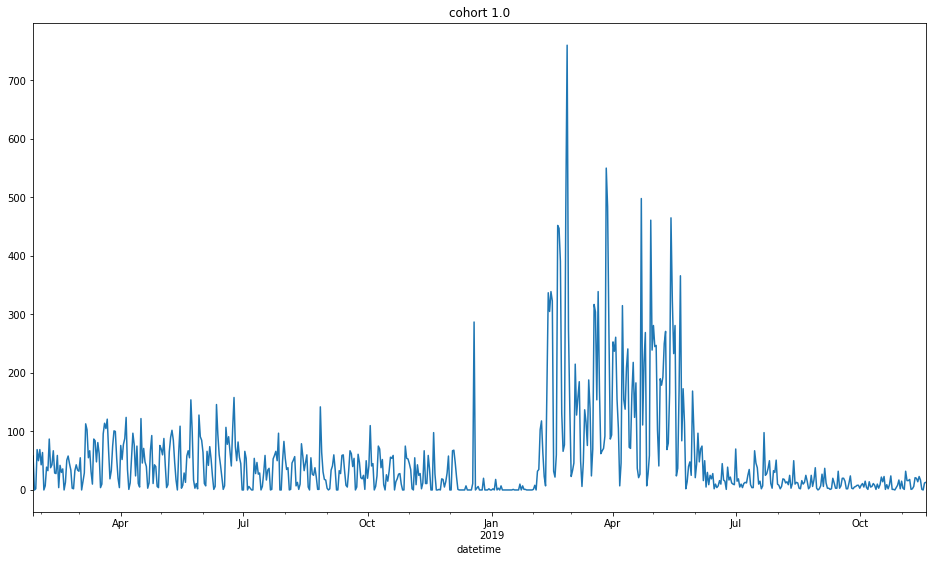

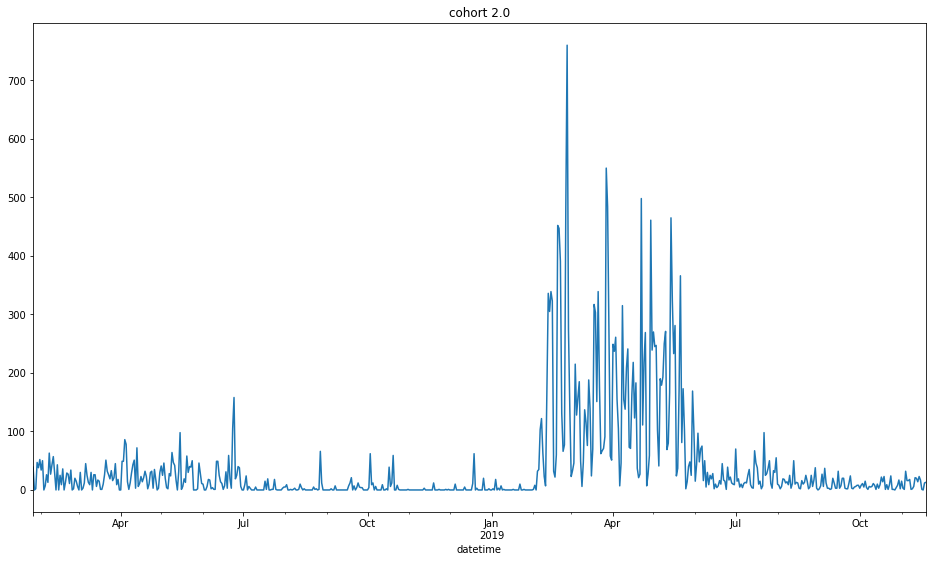

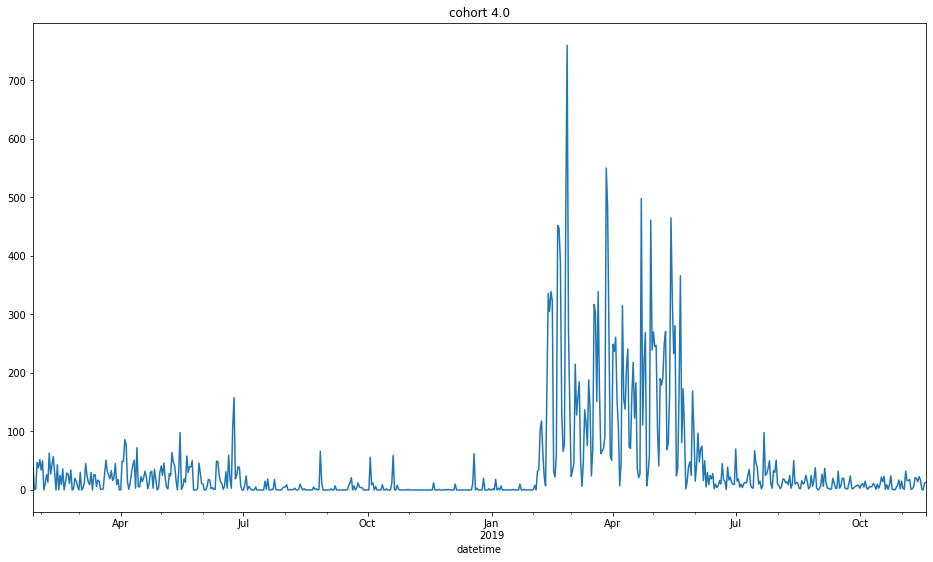

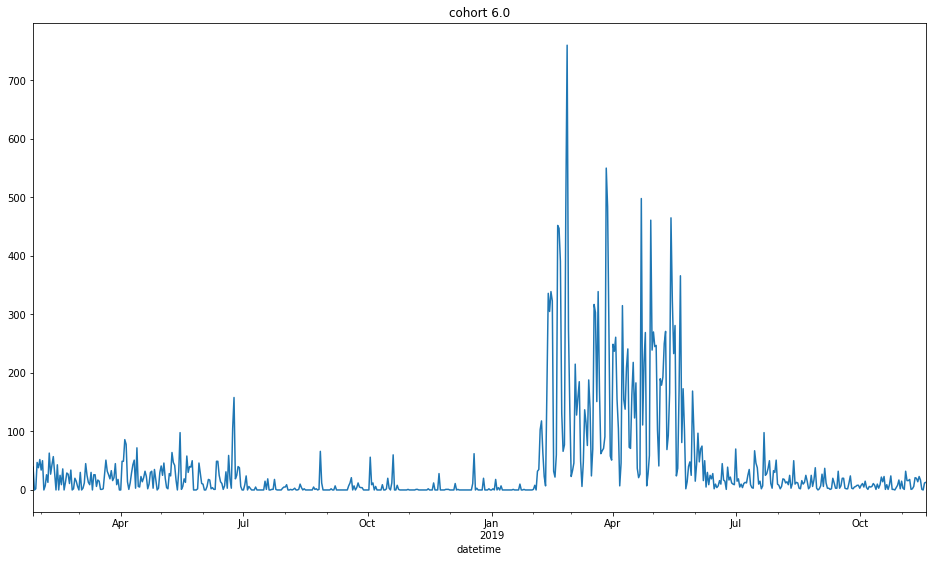

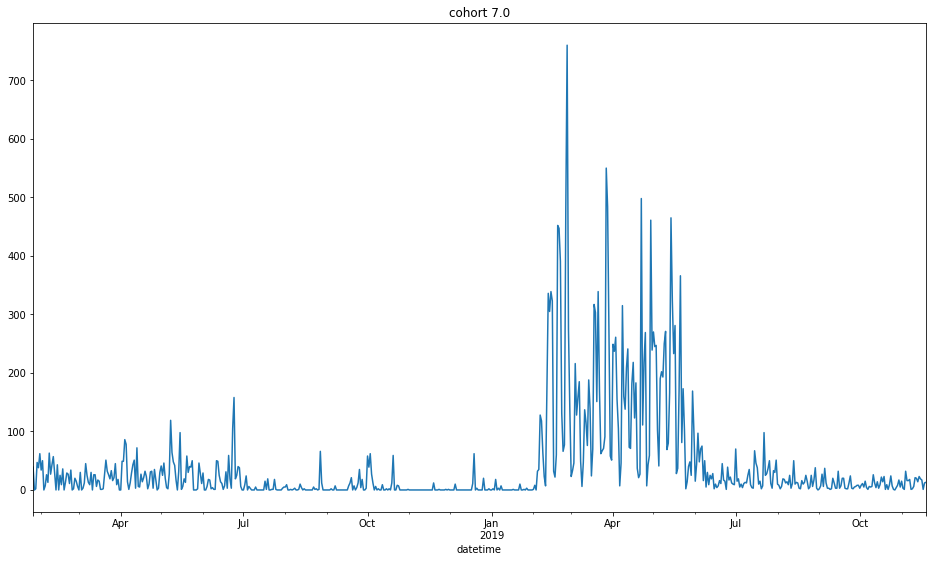

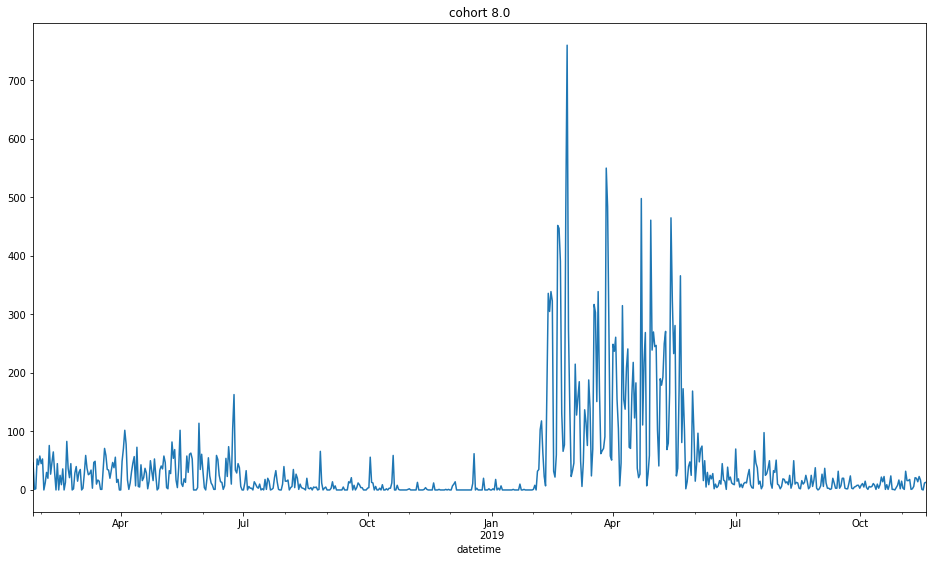

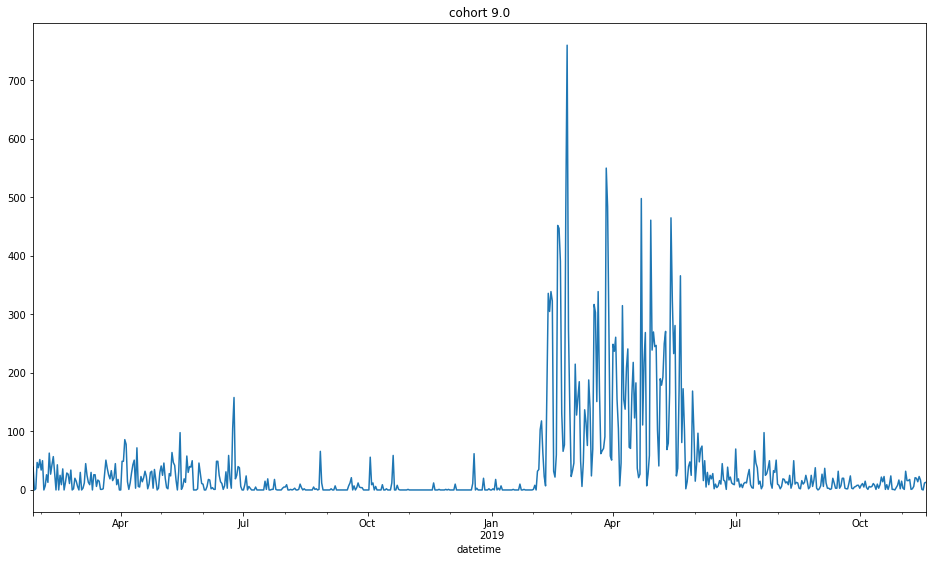

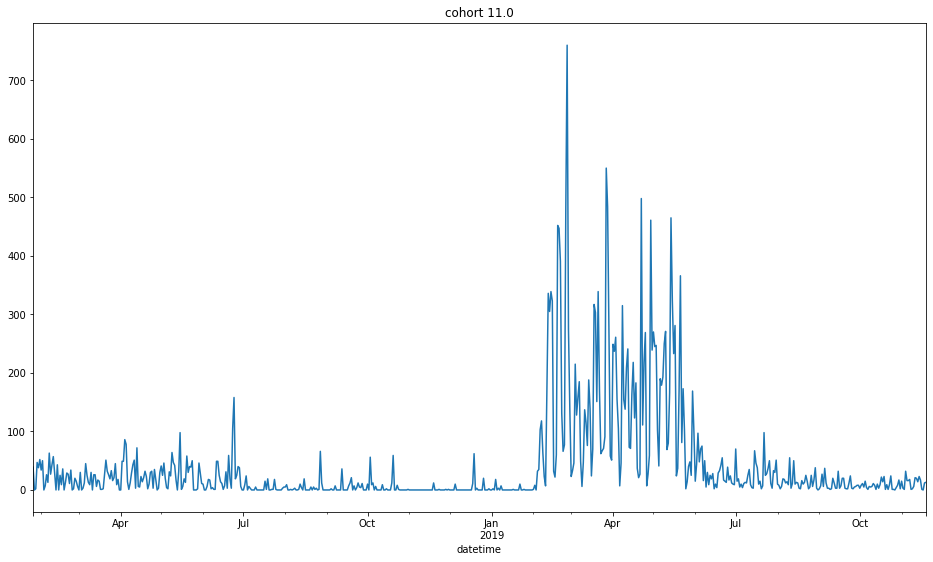

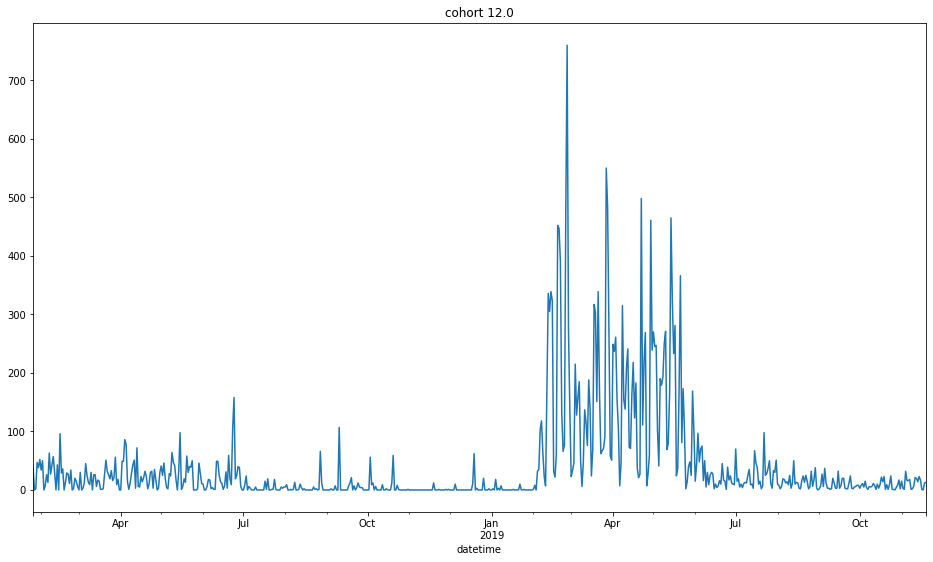

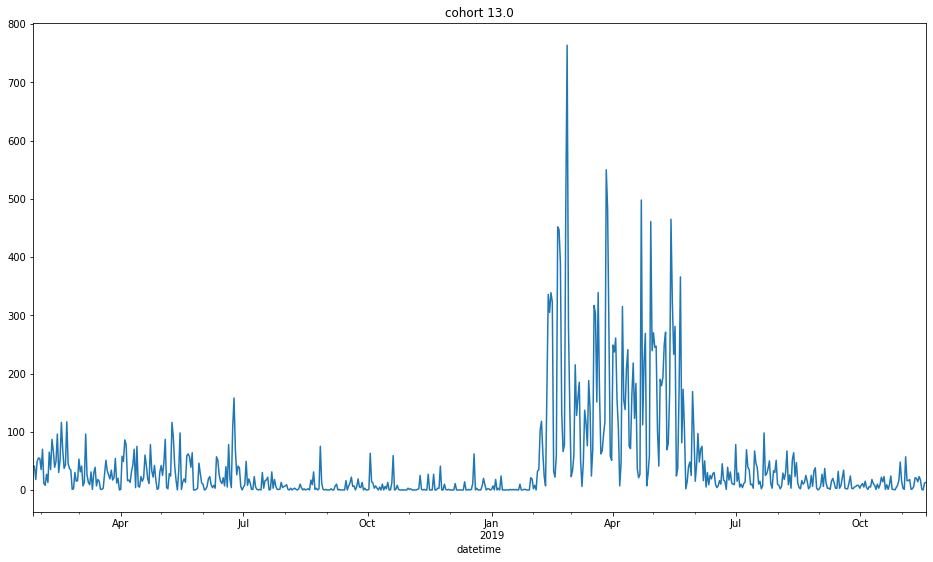

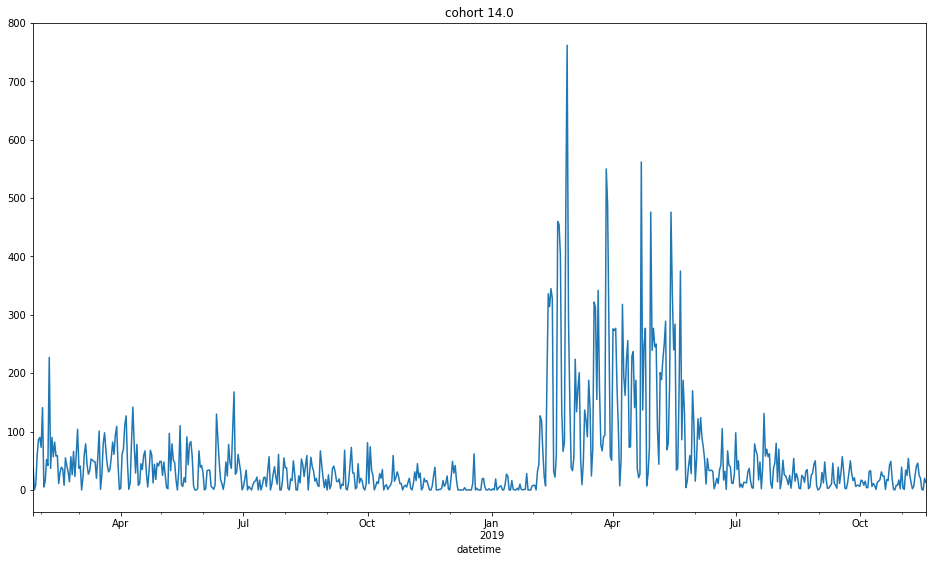

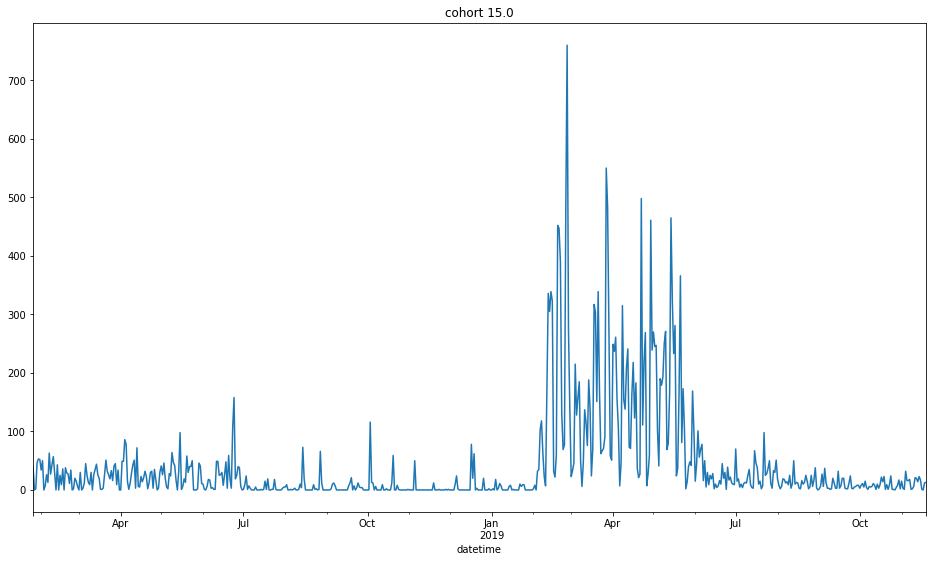

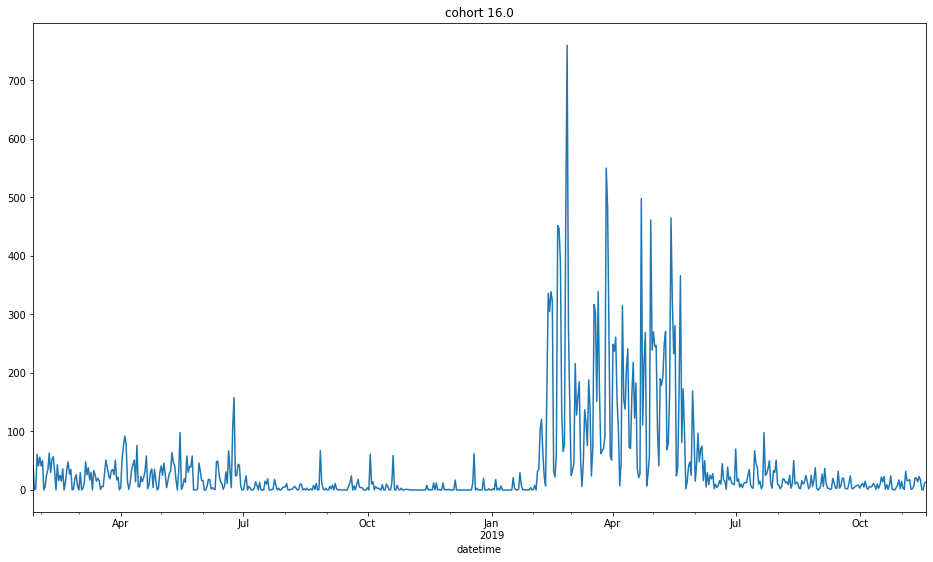

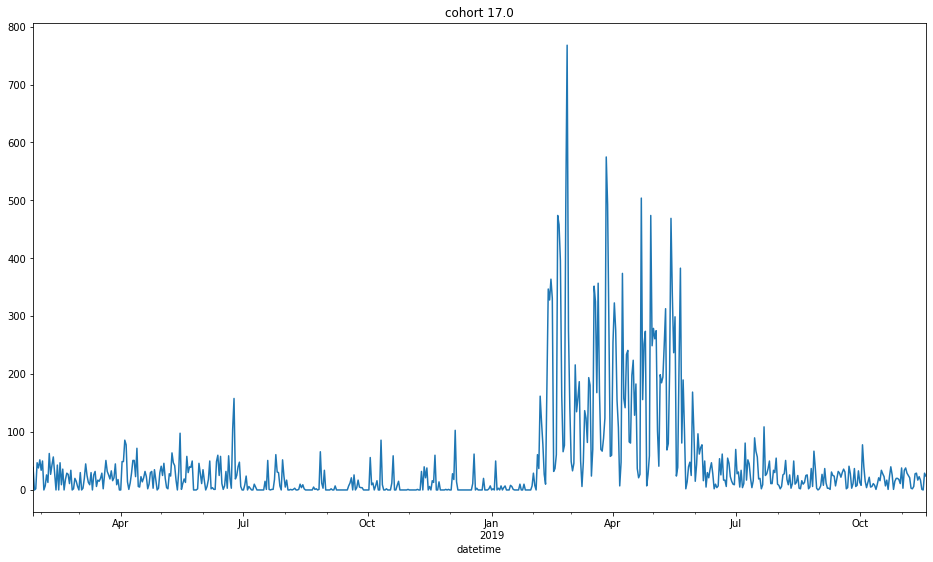

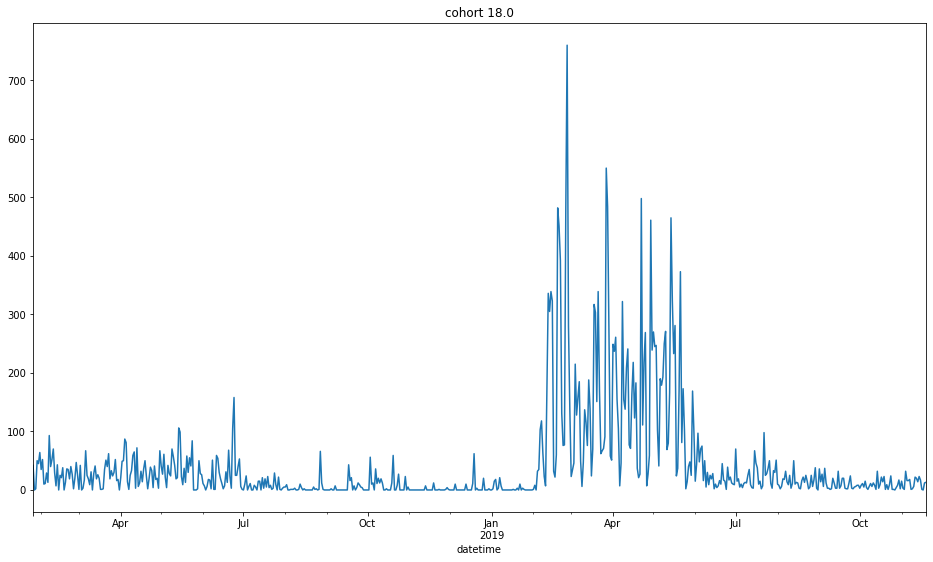

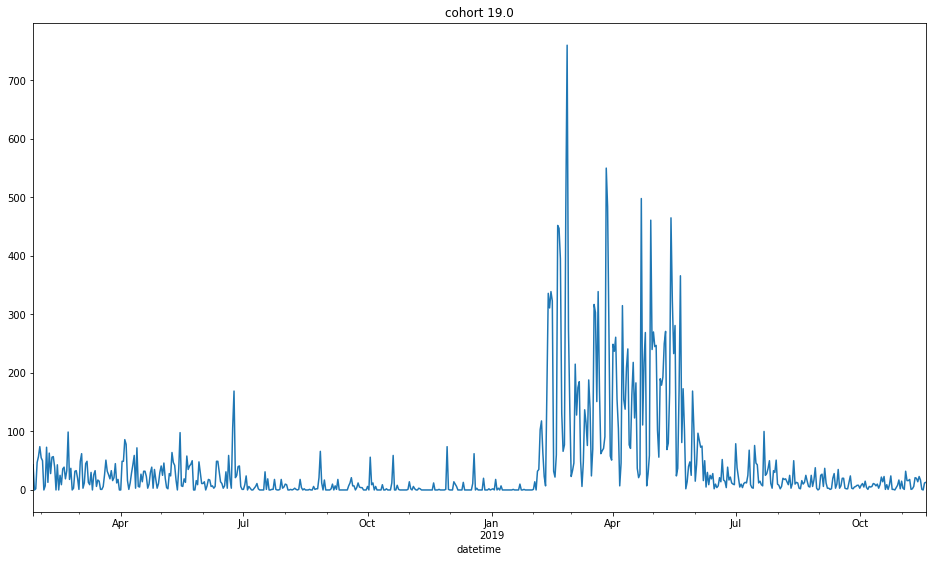

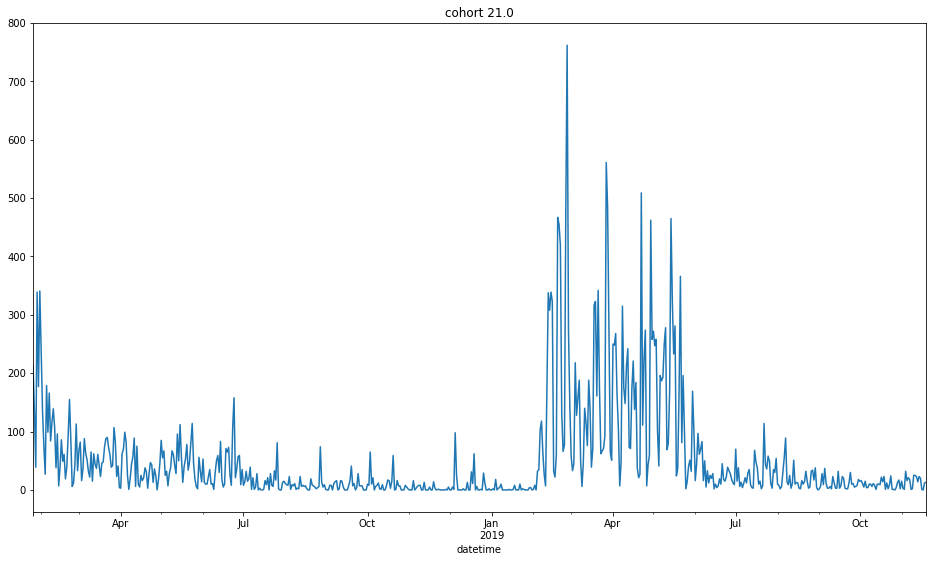

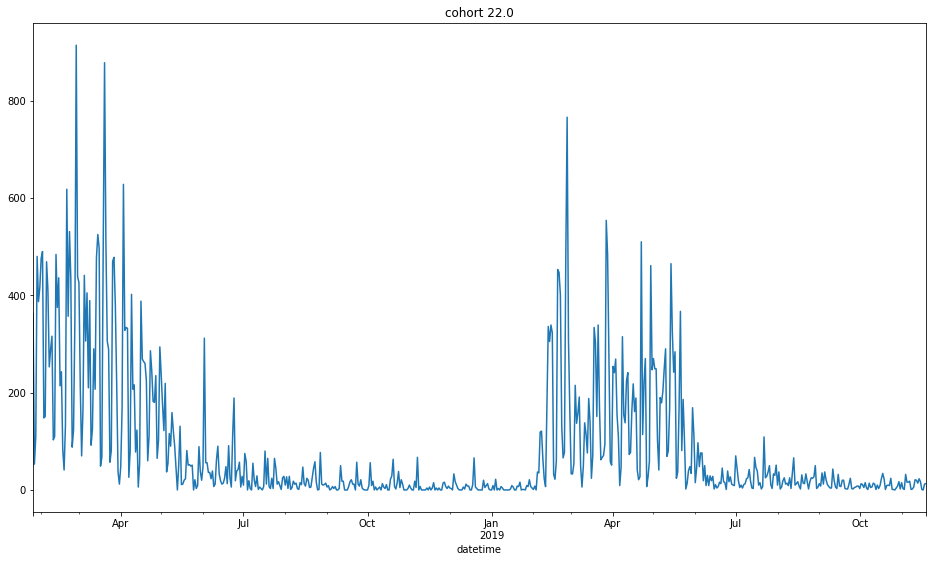

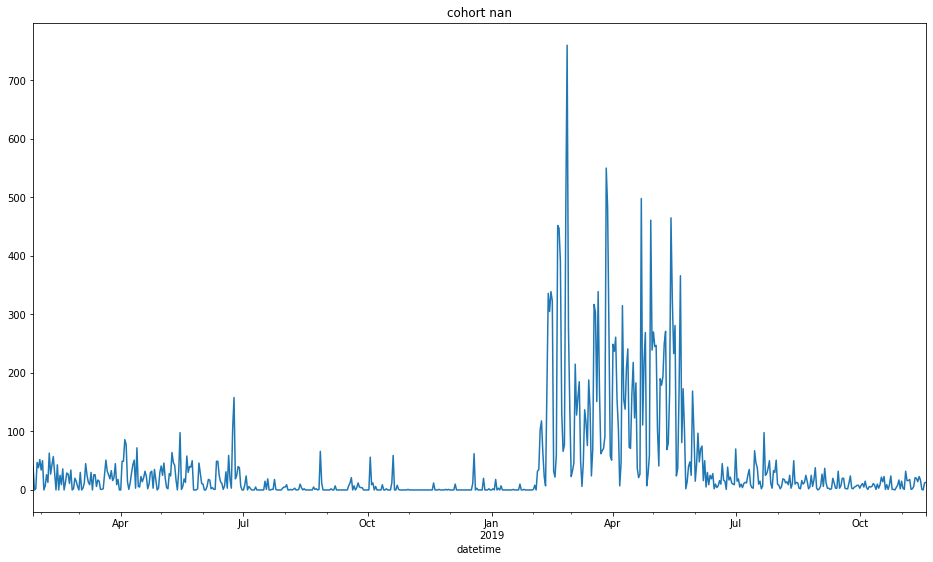

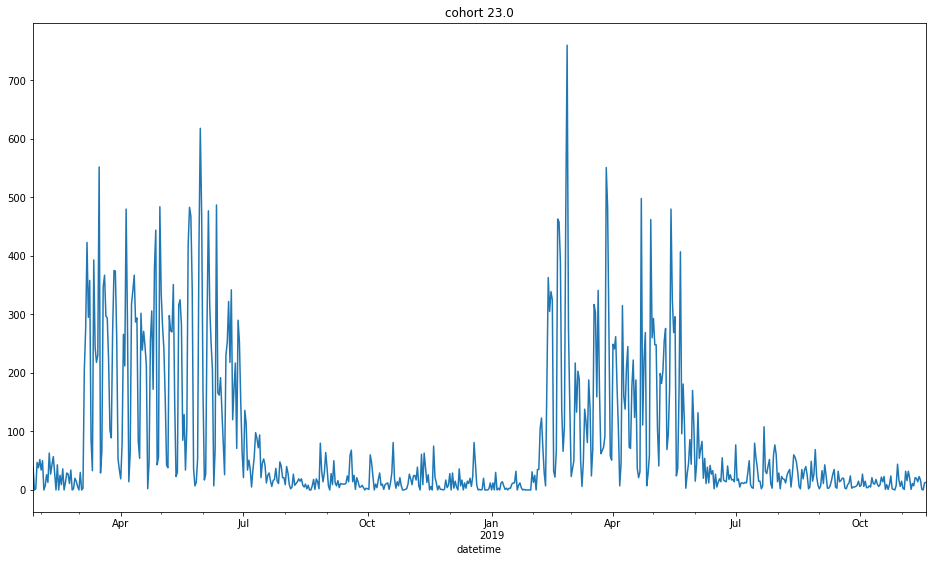

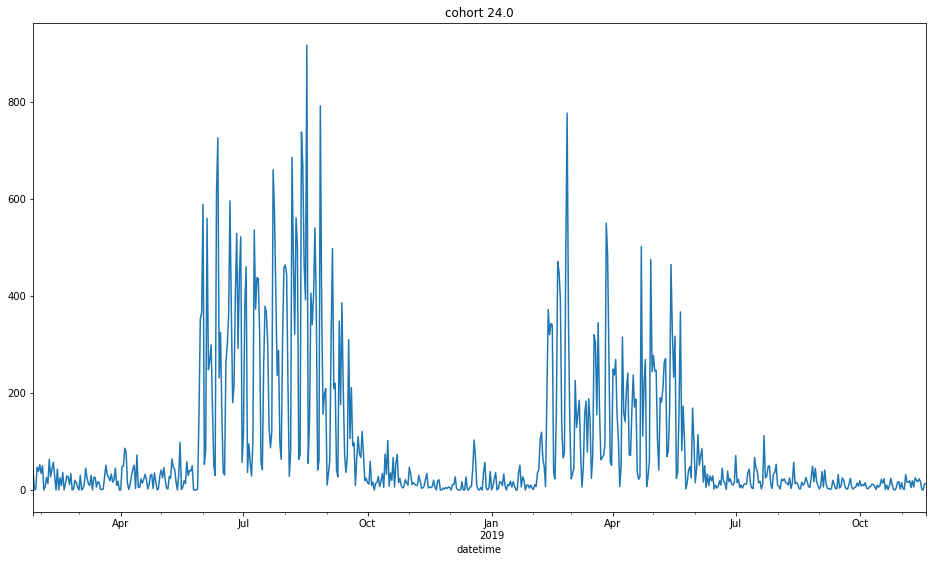

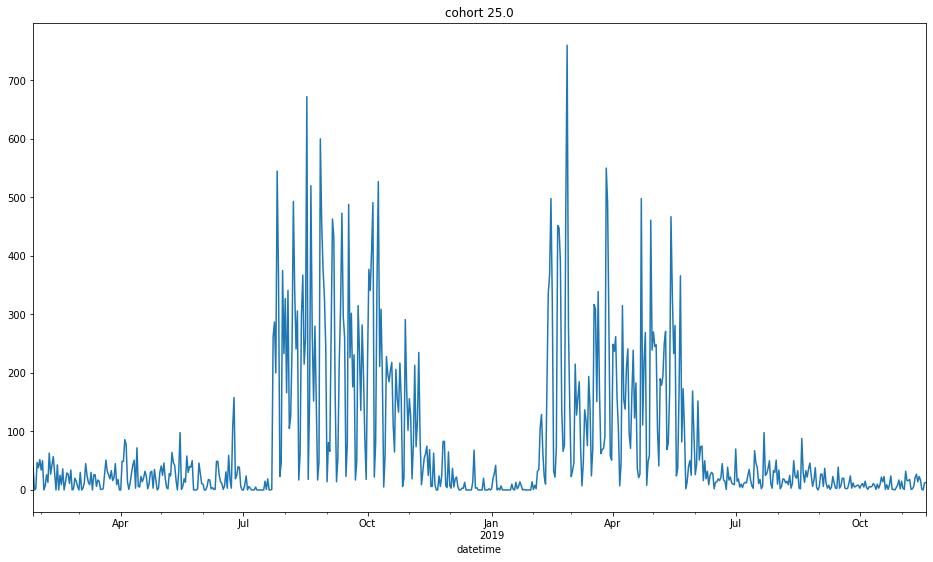

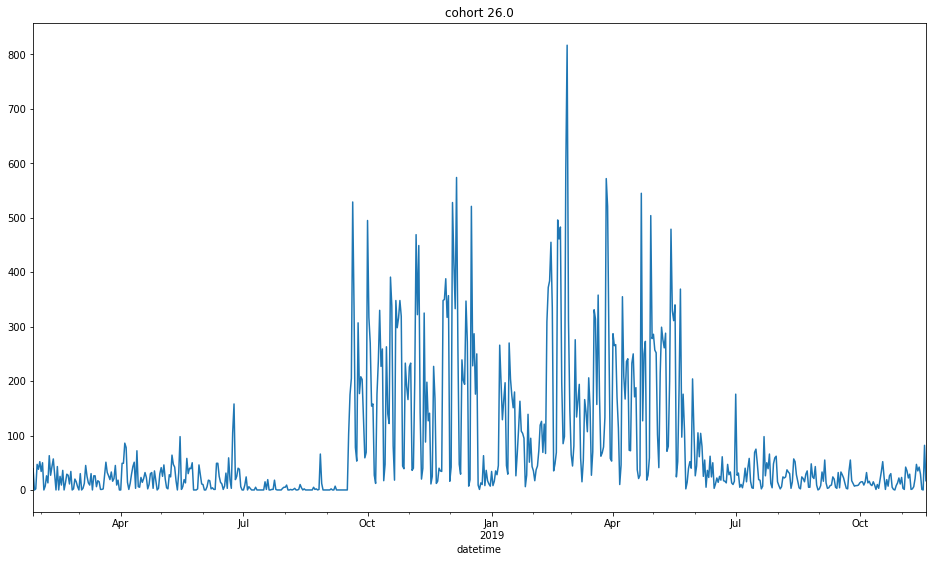

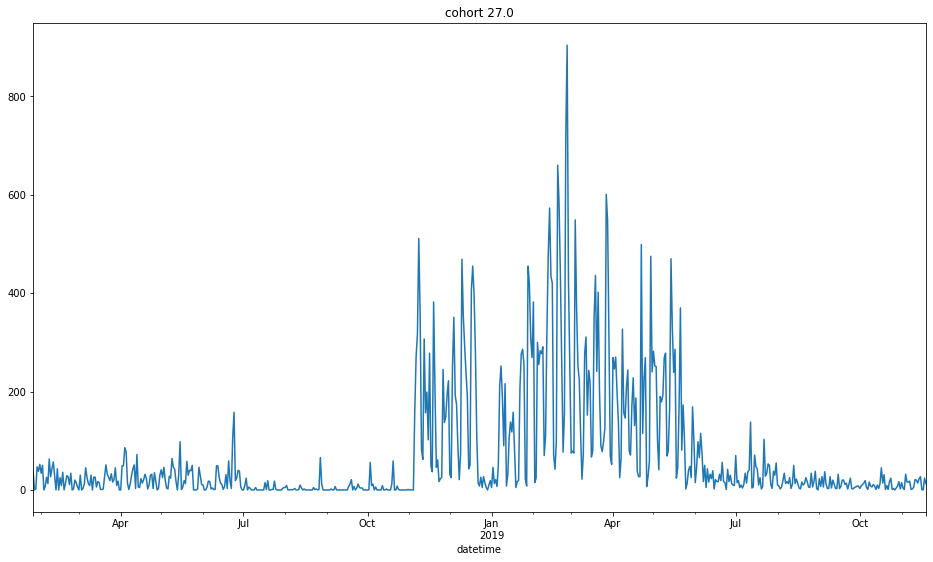

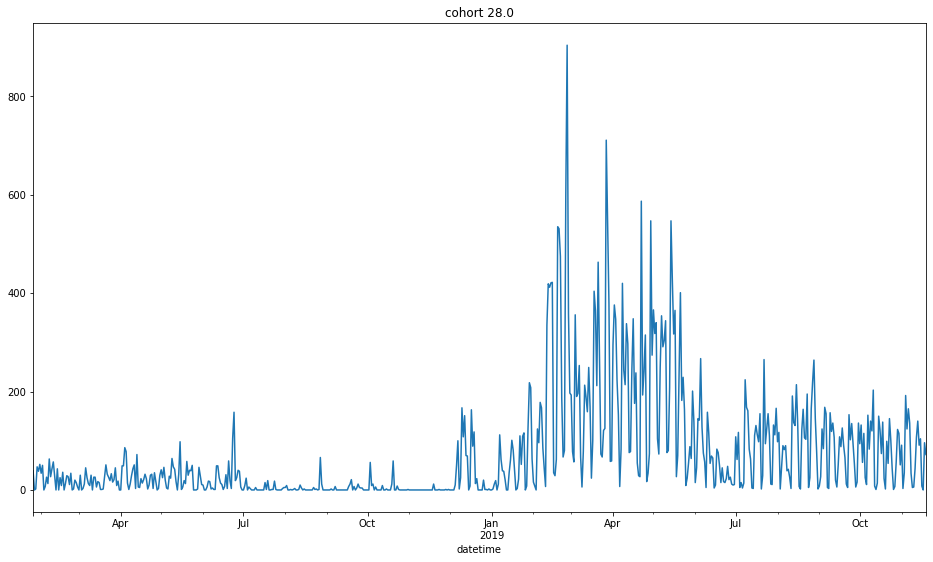

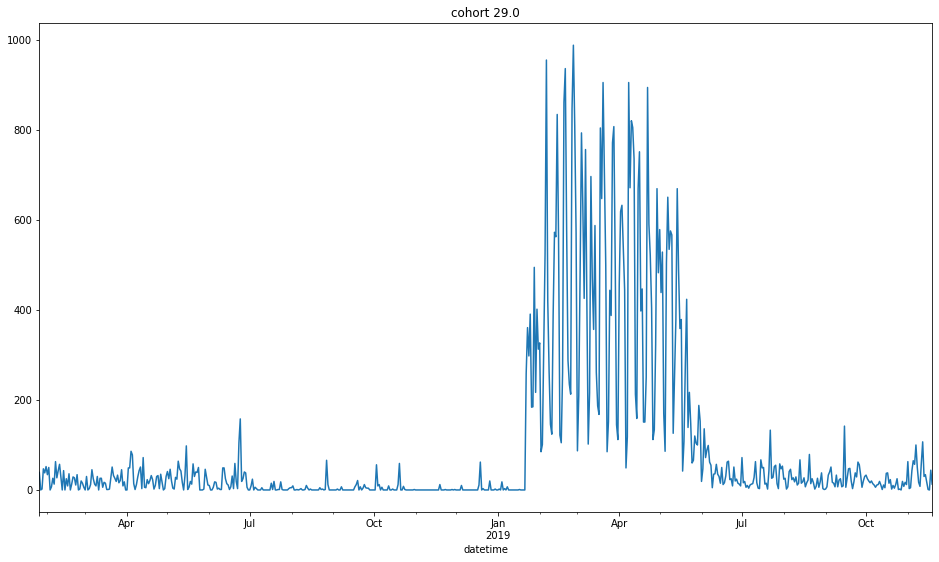

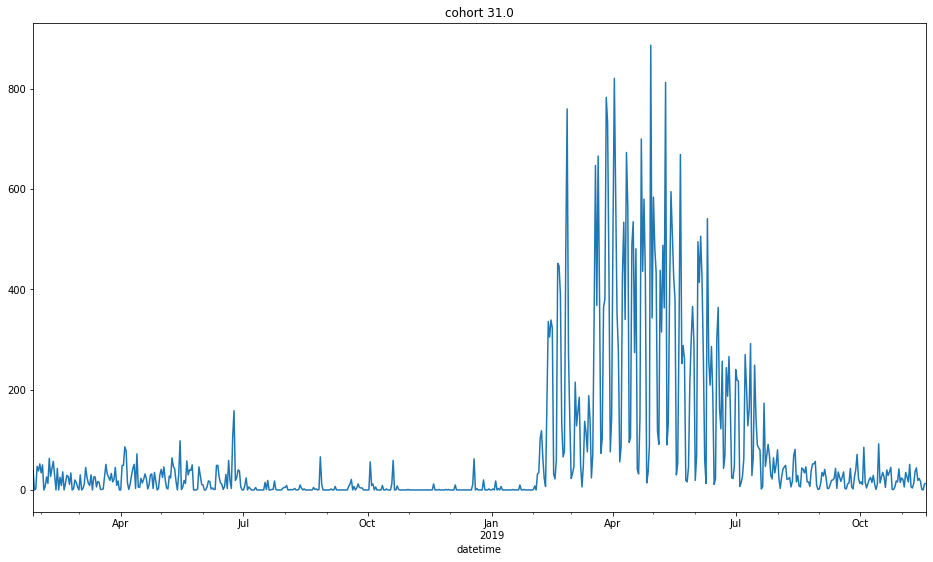

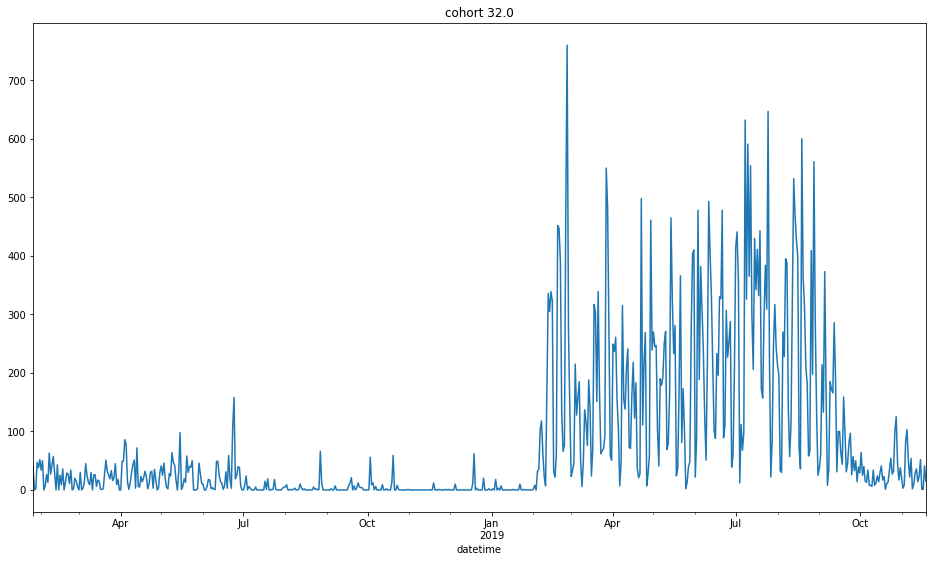

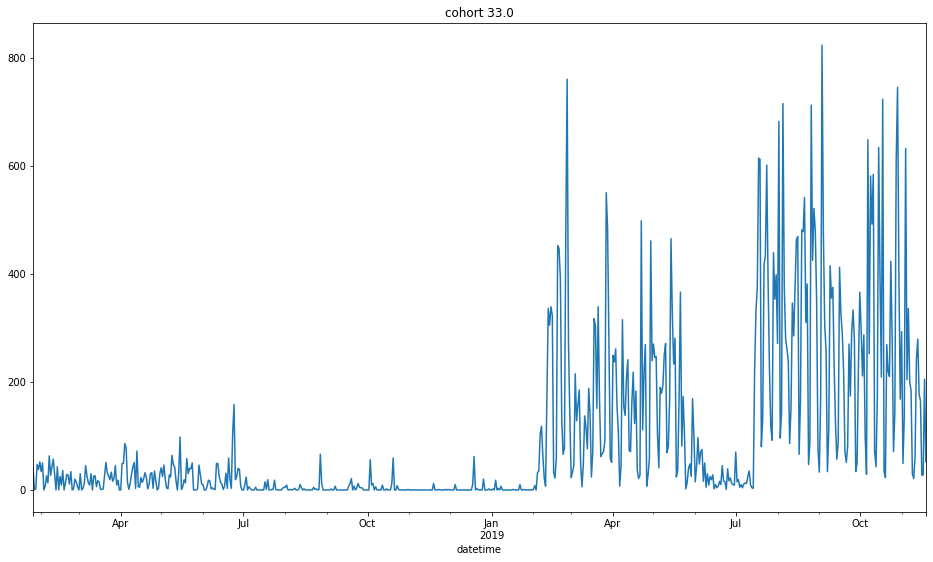

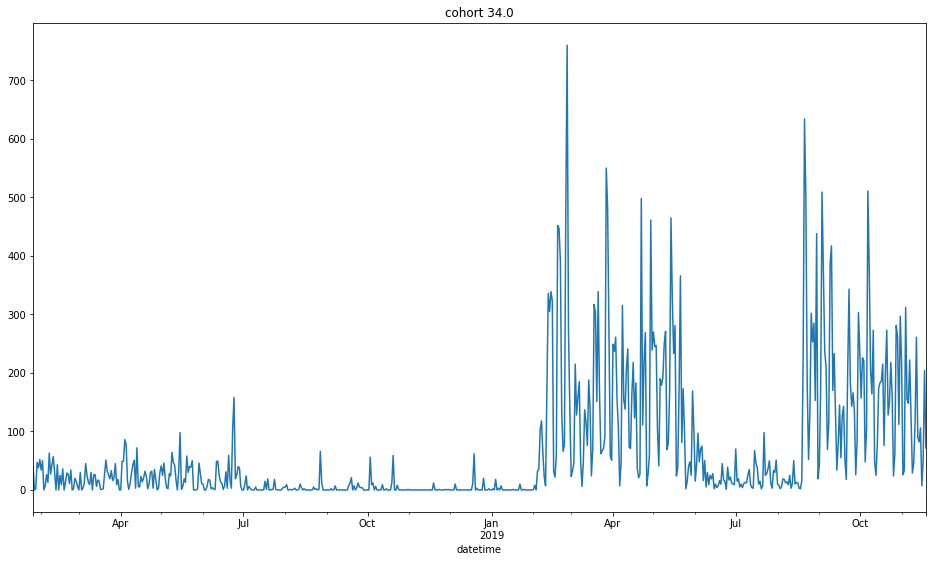

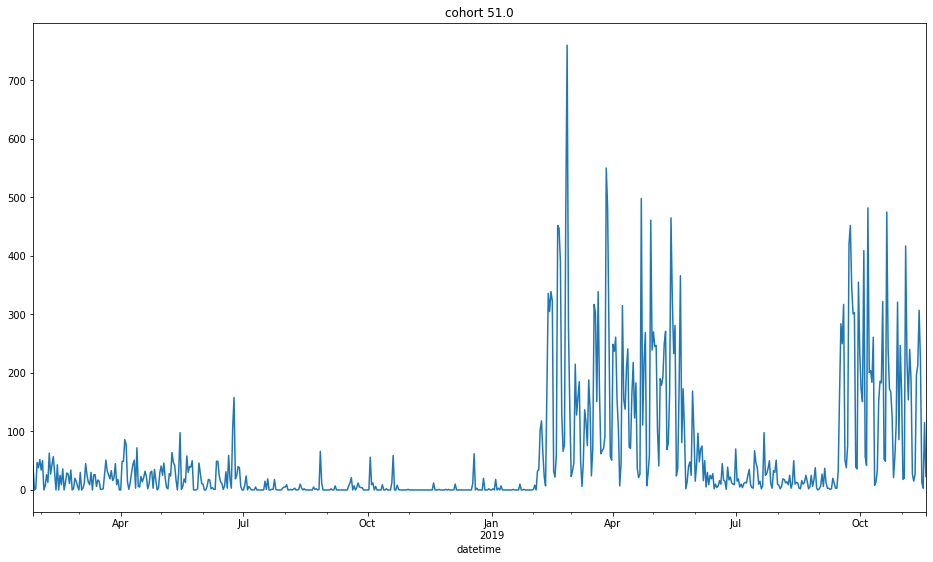

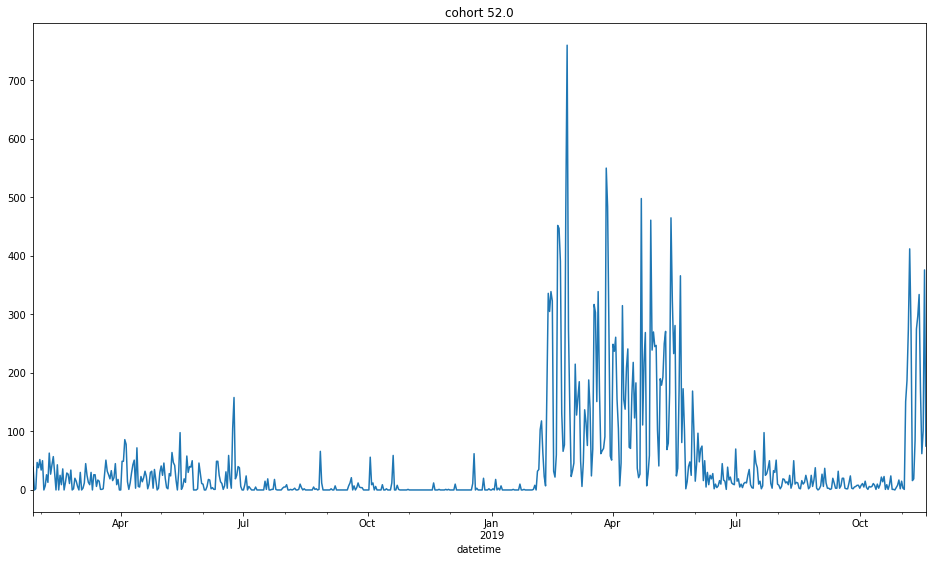

In [26]:
for n in sorted(df.y.unique()):
    df[(df.y==n) | (df.y.isna())]['page'].resample('D').count().plot(figsize=(16,9))
    plt.title('cohort {}'.format(n))
    plt.show()